<a href="https://colab.research.google.com/github/Varchala/NaturalLanguageProcessing_CSC8980/blob/main/exam2_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **G Varchaleswari**

vganugapati1@student.gsu.edu 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import matplotlib.pyplot as plt
import gensim
from nltk.corpus import abc
from collections import Counter, defaultdict
import nltk, re
from nltk import word_tokenize, sent_tokenize
from nltk import bigrams, trigrams
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
seed_value = 12345

#**Question 1) (20 points)**
Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,
‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five
most similar words. For this task you have to use the most suitable method of the ones we have
seen in class to determine the most similar words to the original input list. You can use a
pre-trained resource if you think is appropriate. After calling your function, print the most similar
words to the screen. Are these ‘similar’ words actually similar? If not, why not? What do you
think can be improved and how - talk about it, do not necessarily implement it?


In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Permission denied: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
!gunzip /content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
filename = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
for i in model.most_similar('apple')[0:6]:
  print(i[0])

apples
pear
fruit
berry
pears
strawberry


In [ ]:
for i in model.most_similar('dog')[0:10]:
  print(i[0])

dogs
puppy
pit_bull
pooch
cat
golden_retriever
German_shepherd
Rottweiler
beagle
pup


In [ ]:
def word_similarity(words):
  word_vec_list = []
  for i in words:
    docs = []
    for j in model.most_similar(i)[0:5]:
      docs.append(j[0])
    word_vec_list.append(docs)
  return word_vec_list

In [ ]:
sim_Call= word_similarity( ['apple', 'house', 'pear','dog', 'doctor'])

In [ ]:
sim_Call

[['apples', 'pear', 'fruit', 'berry', 'pears'],
 ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse'],
 ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple'],
 ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat'],
 ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]

Few words that were obtained in the list are quite similar although a few words are redundant. This is one problem I noticed which could be curbed by applying nlp techniques like lemmatization and stemming. A word like 'cat' in comparision to dog is not apt given that the similar words are a set of dog breeds. This is also because cat is an animal the model is categorizing it in the similar way. This could be improved by training the model with a dataset that is relevant to context,i.e. a dataset that has enough combination of sentences to lay a proper distinction between a cat and a dog. But to practically do this at a word level becomes nearly impossible. However, the kind of dataset used to train the neural network, as in word2vec, makes a huge difference and so a relevant dataset could solve this kind of problems to some extent.

# **Question 2) (30 points)**

Using the Homework 2 dataset, also attached in the Exam 2 files, shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity using:

a) Cosine similarity. And create a 42 x 42 heatmap of these similarities.

b) Use Doc2Vec to create document embeddings and find the similarities between the documents. To visualize this, also create a 42 x 42 heatmap for this.

c) What are the differences you find between the two methods? Is there anything radically
different? Please describe your answer in terms of the heatmap of part a and part b.


In [ ]:
path ='/content/drive/MyDrive/exam2/shakespeares-works_TXT_FolgerShakespeare'
count=0
fileMatrix=[]
fileName=[]
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith(".txt"):
            count +=1
            fileName.append(file.name)
            with open(path+"/"+file.name) as openfile:
              fileMatrix.append(openfile.read())
    print(count)

42


In [ ]:
#TfidfVectorizer object
vectorizer = TfidfVectorizer()

# matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(fileMatrix)

#shape of tfidf_matrix
print(tfidf_matrix.shape)

(42, 24618)


In [ ]:
# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

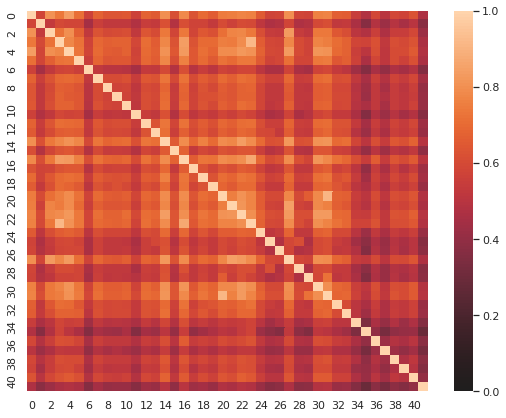

In [ ]:
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cosine_sim, vmin=0, vmax=1,center=0)

# **b)**
Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this.


In [ ]:
!pip install gensim

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
# fileMatrix[0]

In [ ]:
print(fileName)

['richard-iii_TXT_FolgerShakespeare.txt', 'much-ado-about-nothing_TXT_FolgerShakespeare.txt', 'henry-vi-part-3_TXT_FolgerShakespeare.txt', 'venus-and-adonis_TXT_FolgerShakespeare.txt', 'richard-ii_TXT_FolgerShakespeare.txt', 'the-winters-tale_TXT_FolgerShakespeare.txt', 'timon-of-athens_TXT_FolgerShakespeare.txt', 'the-merchant-of-venice_TXT_FolgerShakespeare.txt', 'troilus-and-cressida_TXT_FolgerShakespeare.txt', 'the-two-noble-kinsmen_TXT_FolgerShakespeare.txt', 'loves-labors-lost_TXT_FolgerShakespeare.txt', 'the-taming-of-the-shrew_TXT_FolgerShakespeare.txt', 'cymbeline_TXT_FolgerShakespeare.txt', 'coriolanus_TXT_FolgerShakespeare.txt', 'henry-viii_TXT_FolgerShakespeare.txt', 'the-tempest_TXT_FolgerShakespeare.txt', 'shakespeares-sonnets_TXT_FolgerShakespeare.txt', 'measure-for-measure_TXT_FolgerShakespeare.txt', 'alls-well-that-ends-well_TXT_FolgerShakespeare.txt', 'a-midsummer-nights-dream_TXT_FolgerShakespeare.txt', 'henry-iv-part-1_TXT_FolgerShakespeare.txt', 'henry-vi-part-1_TX

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in zip(fileName,fileMatrix)]

In [ ]:
model_doc2vec = Doc2Vec()
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data,total_examples=model_doc2vec.corpus_count,epochs=model_doc2vec.epochs)

In [ ]:
# print(model_doc2vec.docvecs['richard-iii_TXT_FolgerShakespeare.txt'])
docvec = []
for i in fileName:
  docvec.append(model_doc2vec.docvecs[i])
print(len(docvec))

42


In [ ]:
# compute and print the cosine similarity matrix
cosine_sim_doc2vec = cosine_similarity(docvec, docvec)

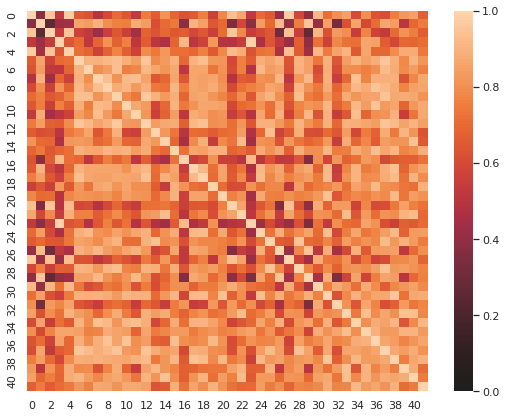

In [ ]:
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cosine_sim_doc2vec, vmin=0, vmax=1,center=0)

# **c**
What are the differences you find between the two methods? Is there anything radically different? Please describe your answer in terms of the heatmap of part a and part b.

The most important and clear difference that I find in the heatmap is that the **Model b** has greater similarity values between different documents as compared to **Model a**. This could be attributed to the method of computation used in these models for finding the document vectors. Model a uses TF-IDF in which words are given weights by term frequency and inverse document frequency instead of only the word frequencies in the document.This helps is finding the important words i.e. words that occur frequently will have less importance due to inverse frequency as compared to rare words. In doc2vec the models are built with underlying representations for each document and its words by using a neural network like CBOW and skipgrams as used in word2vec.Doc2Vec which is a generalization of word2vec model, uses words appearing around the particular word to find the vector (something like bigram and trigram models) whereas tf-idf uses the word frequency in the entire document.

#**Question 3)**

(30 points) Using the Homework 2 dataset. Use SpaCy to extract the following:

a) Write a function to generate all unique bigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of bigrams and their frequency. Display the top 10 most common bigrams and their
frequency.


In [ ]:
from nltk import bigrams, trigrams

In [ ]:
# fileMatrix[0]

In [ ]:
fileMatrix_str = lambda a: "".join([i for i in a])
docm_str = fileMatrix_str(fileMatrix)

In [ ]:
docm_str[:10]

'Richard II'

In [ ]:
def generate_bigrams(sentences):
  corpus=[]
  for sentence in nltk.sent_tokenize(sentences):
    corpus.append(nltk.word_tokenize(sentence))
  model_bi = defaultdict(lambda: defaultdict(lambda: 0)) 
  for sentence in corpus:
      for w1, w2 in bigrams(sentence):
          # print(w1)
          model_bi[w1][w2] += 1
  freq_l = []
  for w1 in model_bi:
      for w2 in model_bi[w1]:
          freq_l.append({str(w1)+" "+str(w2):model_bi[w1][w2]})
  return freq_l


In [ ]:
res_bigram = generate_bigrams(docm_str)

In [ ]:
res_bigram_srt = sorted(res_bigram, key = lambda i: next(iter(i.values())),reverse=True)

In [ ]:
res_bigram_srt[:10]

[{', and': 7555},
 {'. ]': 6765},
 {', I': 4460},
 {', And': 3742},
 {', [': 2773},
 {', my': 2251},
 {'[ Enter': 2177},
 {'I am': 1962},
 {"I 'll": 1854},
 {'I have': 1707}]


b) Write a function to generate all unique trigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of trigrams and their frequency. Display the top 10 most common trigrams and their
frequency.

In [ ]:
def generate_trigrams(sentences):
  corpus=[]
  for sentence in nltk.sent_tokenize(sentences):
    corpus.append(nltk.word_tokenize(sentence))


  model_tri = defaultdict(lambda: defaultdict(lambda: 0))

  
  for sentence in corpus:
      for w1, w2, w3 in trigrams(sentence):
          model_tri[(w1, w2)][w3] += 1
  
  freq_l = []
  for w1_w2 in model_tri:
      total_count = float(sum(model_tri[w1_w2].values()))
      for w3 in model_tri[w1_w2]:
          freq_l.append({str(w1_w2[0])+" "+str(w1_w2[1])+" "+str(w3):model_tri[w1_w2][w3]})

  return freq_l


In [ ]:
res_trigram = generate_trigrams(docm_str)

In [ ]:
res_trigram[1000]

{'Play ====================== Four': 1}

In [ ]:
res_trigram_srt = sorted(res_trigram, key = lambda i: next(iter(i.values())),reverse=True)

In [ ]:
res_trigram_srt[:10]

[{', sir ,': 991},
 {'exits . ]': 986},
 {'exit . ]': 970},
 {', my lord': 957},
 {', [ to': 876},
 {', [ as': 717},
 {'======= [ Enter': 630},
 {', [ aside': 627},
 {"' th '": 580},
 {'[ They exit': 570}]


c) Write a function to extract all unique NOUN and VERB tokens. The input of this function
should be the concatenated dataset and the output should be two lists: one of the NOUN
tokens and their frequency, the other list should be the VERB tokens and their counts.
Display the top 10 most common NOUN and VERB tokens.




In [ ]:
import spacy

In [ ]:
def pos_tag(data_st):
  noun = []
  verb = []
  dv = defaultdict(lambda: 0)
  dn = defaultdict(lambda: 0)
  nlp = spacy.load("en_core_web_sm")
  for i in nltk.sent_tokenize(data_st):
    # nlp.max_length = len(data_st)
    doc = nlp(i)
    for token in doc:
      if token.pos_ == 'VERB':
        dv[token.text] += 1
      elif token.pos_ == 'NOUN':
        dn[token.text] += 1
  for key in dv:
    verb.append((key,dv[key]))
  for key in dn:
    noun.append((key,dn[key]))
  return noun,verb

In [ ]:
n,v = pos_tag(docm_str)

In [ ]:
v_srt = sorted(v, key = lambda i: i[1],reverse=True)

In [ ]:
n_srt = sorted(n, key = lambda i: i[1],reverse=True)

In [ ]:
print("Top 10 most common Nouns :")
print(n_srt[:10])
print("Top 10 most common Verbs :")
print(v_srt[:10])

Top 10 most common Nouns :
[('man', 2000), ('love', 1575), ('sir', 1236), ('heart', 1099), ('time', 1080), ('father', 1021), ('men', 970), ('life', 933), ('hand', 926), ('death', 877)]
Top 10 most common Verbs :
[('will', 4449), ('shall', 3349), ("'ll", 2598), ('would', 2166), ('can', 1901), ('know', 1680), ('Enter', 1640), ('make', 1578), ('come', 1566), ('may', 1546)]


d) What do you think the most common bigrams and trigrams could be useful for? There is
a particular method we have seen in this class to characterize a corpus that could benefit
from having these bigrams/trigrams when the underlying text corpus can’t be shared.
Please talk about this.

The most common bigrams and trigrams could be used for finding something like most similar words. For example a word like german shepherd is most likely to appear with a word like dog and so is dachshund. This will help us to deduce the words with common bigrams could posses some similarity. As language is sequence dependent, it becomes quite useful to deduce the most commonly occuring sequence of terms as  the bigram or trigram probabilities could encode some syntactic facts. For example a word like "loves" is most likely to follow a pronoun or a noun. That means this will also help in finding the parts of speech in a given sentence.

# **Question 4) (30 points)**
Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.

a) First method: using SpaCy (this is a big enough hint)

b) Second method: using regular expressions.

c) Print to screen to compare the results from the two functions.

d) Which one of the two approaches was better? Why do you think so? 
Would you use any
of these approaches? Or a different one?


In [ ]:
q4_data = pd.read_csv('/content/drive/MyDrive/exam2/Ask0729/Ask0729-fixed.txt', delimiter = "\t",header=None)

In [ ]:
q4_data.head()

,0,1
0,No,>>> [1]Contact Me Now to Make $100 Today!$LINK
1,No,Act now to keep your life on the go!
2,No,Choose between $500 and $10000 dollars with up...
3,No,Click above to earn today.
4,No,Click here to receive your first $10 today:


#**spacy**

In [ ]:
def spacy_dates(df):
  dates=[]
  nlp = spacy.load("en_core_web_sm")
  for i in df:
    # print(i)
    doc = nlp(i)
    for ent in doc.ents:
      if ent.label_ == "DATE":
        dates.append(ent.text)
  return dates

In [ ]:
d_a = spacy_dates(q4_data.iloc[:,1])

In [ ]:
len(d_a)

1061

# **Regex**

In [ ]:
def regex_dates(df):
  regex = ['\d+\s\w+\s\d+','(?:(?-i:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*)','(?:(?-i:Mon|Tue|Wed|Fri|Sat|Sun)[a-z]*)']
  regex_str = '(?:% s)' % '|'.join(regex)
  dates = []
  for i in df:
    # print(i)
    for j in regex:
      if re.search(j, i):
        dates.append(re.findall(j, i))
  return [item for i in dates for item in i]

In [ ]:
d_b = regex_dates(q4_data.iloc[:,1])

In [ ]:
len(d_b)

562

In [ ]:
print("Spacy dates: ")
print(d_a)
print("Regular expression dates: ")
print(d_b)

Spacy dates: 
['up to 5 years', 'today', 'today', 'today', 'one week', 'MA 02143', 'daily', 'today', '3+ Nights &', 'this week', 'weekend', 'this week', '2 Weeks', 'the day', 'the year', 'tomorrow', 'the 1st and', 'Wednesday', 'Saturday', 'the 6 year old', 'tomorrow', '25 years', 'year end 2000', '40', 'junior-year', 'all summer', 'next week', 'yesterday', 'Monday', 'Thursday', 'July 31, 2014', '30 June 2012', 'April 15th', 'this year', 'this time', 'next year', 'years', 'Friday', 'Monday', 'December 7th', 'yesterday', 'yesterday', 'tomorrow', '14 day', '2 days', 'years', 'tomorrow', 'tomorrow', 'tomorrow', 'the next year', 'Sunday', 'a day', '12 MONTHS', 'July 4, 2012', 'Tomorrow', 'this week', 'Tuesday, March 20, 2001', 'annual', '21st Century', 'this week', '4', 'tomorrow', 'next Wednesday', 'the old days', 'Next week', 'April', 'the 19th', 'August 31st', 'the year', 'only a week', 'June 23, 2000', 'this weekend', 'today', 'Last week', 'Friday', 'the week', 'the 31st of March', '1 Y

Which one of the two approaches was better? Why do you think so? Would you use any of these approaches? Or a different one?



I find using spacy as a better approach as it is more efficient to use the spacy's trained pipline for NER rather than writing regular expressions for every form of date present in the text. Regex becomes more tedious when we need to find the required expression which is not in a definite form and also it is not a model that has some understanding of what could follow or occur before a word/key/number to make it a relevant date instance in the document.

# **Question 5) (30 points)**
Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0. You can use the code for class 19, but take a note that
you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use
85% of the dataset for training, and 15% for testing. Once you build the model, please display
the sklearn classification report. What are you noticing here? Anything unexpected? How does
this model compare to the one built with the IMDB dataset in class? Any ideas on how to
improve it?


In [ ]:
def file_extract(data,dir):
  path = '/content/drive/MyDrive/exam2/txt_sentoken/'
  path += dir
  with os.scandir(path) as files:
    for file in files:
      if file.name.endswith(".txt"):
        with open(path+"/"+file.name) as review:
          data = data.append({'data':review.read(),'labels':dir,'name':file.name},ignore_index=True)
  return data

In [ ]:
q5_data = pd.DataFrame()
q5_data = file_extract(q5_data,"neg")
q5_data = file_extract(q5_data,"pos")

In [ ]:
q5_data

,data,labels,name
0,"before the remake of psycho appears , we've go...",neg,cv080_14899.txt
1,""" there will be another , "" the ads for this ...",neg,cv072_5928.txt
2,"there's a 1 , 000-foot tidal wave at the end o...",neg,cv071_12969.txt
3,"for better or worse , the appearance of basic ...",neg,cv074_7188.txt
4,""" virus "" is the type of cliched , vacuous fi...",neg,cv078_16506.txt
...,...,...,...
1995,"ingredients : down-on-his-luck evangelist , ch...",pos,cv923_11051.txt
1996,when i first saw the previews for ron howard's...,pos,cv940_17705.txt
1997,"armageddon , in itself , symbolizes everything...",pos,cv932_13401.txt
1998,there are some works of art that are almost im...,pos,cv930_13475.txt


In [ ]:
q5_data['labels'] = q5_data['labels'].map({'pos': 1, 'neg': 0}).astype(int)
q5_data

,data,labels,name
0,"before the remake of psycho appears , we've go...",0,cv080_14899.txt
1,""" there will be another , "" the ads for this ...",0,cv072_5928.txt
2,"there's a 1 , 000-foot tidal wave at the end o...",0,cv071_12969.txt
3,"for better or worse , the appearance of basic ...",0,cv074_7188.txt
4,""" virus "" is the type of cliched , vacuous fi...",0,cv078_16506.txt
...,...,...,...
1995,"ingredients : down-on-his-luck evangelist , ch...",1,cv923_11051.txt
1996,when i first saw the previews for ron howard's...,1,cv940_17705.txt
1997,"armageddon , in itself , symbolizes everything...",1,cv932_13401.txt
1998,there are some works of art that are almost im...,1,cv930_13475.txt


In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing import sequence
import logging
from sklearn.model_selection import train_test_split
logging.getLogger('tensorflow').disabled = True
class_names = ["Negative", "Positive"]


In [ ]:
a_train,a_test = train_test_split(q5_data, test_size=0.15, random_state=seed_value)

In [ ]:
x_train = []
x_test = []
for i in a_train.data:
    x_train.append(i)
for i in a_test.data:
    x_test.append(i)
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = a_train['labels'].values
y_test = a_test['labels'].values
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Perform reverse word lookup and make it callable
reverse_word_index = dict([(key,tokenizer.index_word[key]) for key in tokenizer.index_word])
reverse_word_index[0] = "<PAD>"
def decode_review(text):
    return ' '.join([reverse_word_index[i] for i in text])

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)
# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[1]))
print("  Review Sentiment: " + str(y_train[1]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[1]))
print("  Review Sentiment: " + class_names[y_train[1]])

Maximum review length: 2680
Minimum review length: 18
Mean review length: 745.7995

Machine readable Review
  Review Text: [2360, 52, 28232, 5, 6365, 28233, 28234, 177, 99, 1625, 38, 39, 16999, 1220, 1581, 100, 25, 1437, 107, 78, 64, 22, 18, 28235, 7544, 393, 6, 39, 733, 14485, 3, 28236, 1, 355, 1647, 4483, 17000, 7116, 2102, 15, 28237, 437, 1, 9, 2, 5486, 1, 5, 241, 335, 2103, 3, 4642, 52, 1781, 4643, 818, 15, 4, 1781, 293, 1, 5, 2, 31, 156, 68, 6707, 11, 61, 4, 1254, 1968, 2591, 7, 223, 6366, 7545, 1, 12650, 1, 1469, 3, 220, 40, 23, 99, 1141, 9, 463, 7545, 1469, 1, 312, 1, 29, 2137, 40, 3467, 126, 20, 6041, 5, 266, 2, 3468, 3565, 5, 1901, 631, 8057, 330, 3181, 1, 219, 1648, 22, 267, 450, 3, 381, 230, 15, 11, 10, 31, 1, 10, 40, 144, 34, 7, 146, 137, 2, 2061, 599, 6, 334, 6366, 475, 7, 12651, 2494, 20963, 643, 47, 10, 6708, 3, 10, 193, 688, 101, 1969, 9, 2, 31, 3, 4315, 1, 140, 1716, 2275, 9366, 2322, 51, 1261, 2704, 39, 1469, 1, 70, 14486, 39, 733, 142, 2894, 17001, 28238, 6, 2027, 22

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# The length of reviews
review_length =  450
# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

In [ ]:
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))
print("Review data"+str(x_train[60]))
print()
print("Human Readable Review Text (post padding):\n" + decode_review(x_train[60]))

Shape Training Review Data: (1700, 450)
Shape Training Class Data: (1700,)
Shape Test Review Data: (300, 450)
Shape Test Class Data: (300,)
Review data[   18    96     6 28977   150     8    26  8206   126     2   369   940
  2093     3    42    80    47    11     2    19   127   181     4   820
   446    38   105     6     2   940  5514    54 28978     1    24    38
  2334     9   859     5   121   319     8   471    26     2   790    13
   310     2 28979  9553    86    77     4   290  4058    26     2   151
     6     2    19    12     3    42   703     6     2  3594    23   351
   762     1   135    16     4  5338  6139    11    25  1191    38     4
 21362  3277     7    57     3    42  1971     6     2    19     8   335
  2500     1    24   257     2   256   232    45    14     3    42   124
    28  1515     1   694    19    38     2  2118     1    24     2  3825
    11  3227    37   932     8    49    78    48  8207    63   755   636
     9     2   569     3    42   317  1287    

In [ ]:
print(vocab_size)

52062


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = 32,input_length = review_length))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 450, 32)           1665984   
_________________________________________________________________
dropout_4 (Dropout)          (None, 450, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,674,337
Trainable params: 1,674,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=100,epochs=5,validation_split=0.2,verbose=1) 

Epoch 1/5
14/14 [==============================] - 7s 345ms/step - loss: 0.6934 - accuracy: 0.5191 - val_loss: 0.6932 - val_accuracy: 0.4882
Epoch 2/5
14/14 [==============================] - 5s 324ms/step - loss: 0.6914 - accuracy: 0.5709 - val_loss: 0.6920 - val_accuracy: 0.5206
Epoch 3/5
14/14 [==============================] - 5s 328ms/step - loss: 0.6843 - accuracy: 0.5721 - val_loss: 0.6817 - val_accuracy: 0.5235
Epoch 4/5
14/14 [==============================] - 5s 325ms/step - loss: 0.6336 - accuracy: 0.7276 - val_loss: 0.6659 - val_accuracy: 0.6235
Epoch 5/5
14/14 [==============================] - 5s 327ms/step - loss: 0.5910 - accuracy: 0.7956 - val_loss: 0.6289 - val_accuracy: 0.7000


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.69      0.63      0.66       164
    Positive       0.59      0.65      0.62       136

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.64      0.64      0.64       300



In [ ]:
import sklearn.metrics as sm
def evaluate_model(pred,y):
  acc = sm.accuracy_score(y,pred)
  pr = sm.precision_score(y,pred)
  re = sm.recall_score(y,pred)
  f1 = sm.f1_score(pred, y, average='macro')
  return acc,pr,re,f1

In [ ]:
acc_nb,pr_nb,re_nb,f1_nb=evaluate_model(predicted_classes,y_test)
print("Accuracy : "+str(acc_nb))
print("Precision : "+str(pr_nb))
print("Recall : "+str(re_nb))
print("F1 Score : "+str(f1_nb))

Accuracy : 0.64
Precision : 0.5933333333333334
Recall : 0.6544117647058824
F1 Score : 0.6392142888958177


The metrics values are less as compared to the one trained using IMDB dataset. One reason is the size of the dataset. For LSTMs to perform well, input data should be of a fairly larger size than the one used in this model. Removing some irreleant stop words may improve the model's performance.

# **Question 6) (30 points)**

Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the
source dataset has FIVE different classes: background, objective, method, result, and
conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the
per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the
global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the
baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve
it?


In [ ]:
q6_data = pd.read_csv('/content/drive/MyDrive/exam2/train.txt',delimiter= '\t',skipinitialspace=True, header=None)

In [ ]:
q6_test = pd.read_csv('/content/drive/MyDrive/exam2/test.txt',delimiter= '\t',skipinitialspace=True, header=None)

In [ ]:
q6_test.columns=['label','text']
q6_test.head()

,label,text
0,BACKGROUND,This study analyzed liver function abnormaliti...
1,RESULTS,A post hoc analysis was conducted with the use...
2,RESULTS,Liver function tests ( LFTs ) were measured at...
3,RESULTS,Survival analyses were used to assess the asso...
4,RESULTS,The percentage of patients with abnormal LFTs ...


In [ ]:
q6_data.columns=['label','text']

In [ ]:
q6_data.head()

,label,text
0,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...
1,METHODS,A total of 125 patients with primary knee OA w...
2,METHODS,Outcome measures included pain reduction and i...
3,METHODS,Pain was assessed using the visual analog pain...
4,METHODS,Secondary outcome measures included the Wester...


In [ ]:
q6_classes=['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']
q6_data['label'] = q6_data['label'].map({'BACKGROUND':0, 'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4}).astype(int)

In [ ]:
q6_test['label'] = q6_test['label'].map({'BACKGROUND':0, 'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4}).astype(int)

In [ ]:
q6_data.head()

,label,text
0,1,To investigate the efficacy of 6 weeks of dail...
1,2,A total of 125 patients with primary knee OA w...
2,2,Outcome measures included pain reduction and i...
3,2,Pain was assessed using the visual analog pain...
4,2,Secondary outcome measures included the Wester...


In [ ]:
q6_test

,label,text
0,0,This study analyzed liver function abnormaliti...
1,3,A post hoc analysis was conducted with the use...
2,3,Liver function tests ( LFTs ) were measured at...
3,3,Survival analyses were used to assess the asso...
4,3,The percentage of patients with abnormal LFTs ...
...,...,...
30130,3,There was a statistically significant between-...
30131,3,There were no statistically significant betwee...
30132,3,There was no significant association between s...
30133,3,No adverse effects were reported .


In [ ]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

if torch.cuda.is_available():     
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers

In [ ]:
q6_text = q6_data.iloc[:,1].values
q6_label = q6_data.iloc[:,0].values

In [ ]:
# q6_test.iloc[:,0].values

In [ ]:
q6_text_test = q6_test.iloc[:,1].values
q6_label_test = q6_test.iloc[:,0].values

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
print(' Original: ', q6_text[0])
print('Tokenized: ', tokenizer.tokenize(q6_text[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(q6_text[0])))

 Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Tokenized:  ['to', 'investigate', 'the', 'efficacy', 'of', '6', 'weeks', 'of', 'daily', 'low', '-', 'dose', 'oral', 'pre', '##d', '##nis', '##olo', '##ne', 'in', 'improving', 'pain', ',', 'mobility', ',', 'and', 'systemic', 'low', '-', 'grade', 'inflammation', 'in', 'the', 'short', 'term', 'and', 'whether', 'the', 'effect', 'would', 'be', 'sustained', 'at', '12', 'weeks', 'in', 'older', 'adults', 'with', 'moderate', 'to', 'severe', 'knee', 'os', '##te', '##oa', '##rth', '##rit', '##is', '(', 'o', '##a', ')', '.']
Token IDs:  [2000, 8556, 1996, 21150, 1997, 1020, 3134, 1997, 3679, 2659, 1011, 13004, 8700, 3653, 2094, 8977, 12898, 2638, 1999, 9229, 3255, 1010, 12969, 1010, 1998, 22575, 2659, 1011, 

In [ ]:
def bert_encode(data_bert,l):
  input_ids = []
  attention_masks = []

  # For every sentence...
  for sent in data_bert:
      encoded_dict = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = 64,pad_to_max_length = True,return_attention_mask = True,return_tensors = 'pt') 
      input_ids.append(encoded_dict['input_ids'])
      attention_masks.append(encoded_dict['attention_mask'])



  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  l = torch.tensor(l)
  return input_ids,attention_masks,l


In [ ]:
input_ids_train,attention_masks_train,l_train = bert_encode(q6_text,q6_label)
input_ids_test,attention_masks_test,l_test = bert_encode(q6_text_test,q6_label_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print('Original: ', q6_text[0])
print('Token IDs:', input_ids_train[0])

Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,  1999,  1996,  2460,  2744,  1998,  3251,  1996,  3466,  2052,
         2022,  8760,  2012,  2260,  3134,  1999,  3080,  6001,  2007,  8777,
         2000,  5729,  6181,  9808,  2618, 10441, 15265, 14778,  2483,  1006,
         1051,  2050,  1007,   102])


In [ ]:
q6_data.shape

(180040, 2)

In [ ]:
q6_test.shape

(30135, 2)

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset_train = TensorDataset(input_ids_train, attention_masks_train, l_train)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset_train))
val_size = len(dataset_train) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset_train, [train_size, val_size],generator=torch.Generator().manual_seed(seed_value))

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
dataset_test = TensorDataset(input_ids_test, attention_masks_test, l_test)

162,036 training samples
18,004 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = 32 # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = 32 # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 5,output_attentions = False,output_hidden_states = False)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8)

In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 2
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0,num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)


training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
 
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

 
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

   
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

     
        model.zero_grad()        

     
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

       
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

   
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        

    print("")
    print("Running Validation...")

    t0 = time.time()

  
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
    
        with torch.no_grad():        

        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

      
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

      
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 2 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:15.
  Batch    80  of  5,064.    Elapsed: 0:00:31.
  Batch   120  of  5,064.    Elapsed: 0:00:47.
  Batch   160  of  5,064.    Elapsed: 0:01:02.
  Batch   200  of  5,064.    Elapsed: 0:01:18.
  Batch   240  of  5,064.    Elapsed: 0:01:33.
  Batch   280  of  5,064.    Elapsed: 0:01:49.
  Batch   320  of  5,064.    Elapsed: 0:02:05.
  Batch   360  of  5,064.    Elapsed: 0:02:20.
  Batch   400  of  5,064.    Elapsed: 0:02:36.
  Batch   440  of  5,064.    Elapsed: 0:02:51.
  Batch   480  of  5,064.    Elapsed: 0:03:07.
  Batch   520  of  5,064.    Elapsed: 0:03:23.
  Batch   560  of  5,064.    Elapsed: 0:03:38.
  Batch   600  of  5,064.    Elapsed: 0:03:54.
  Batch   640  of  5,064.    Elapsed: 0:04:10.
  Batch   680  of  5,064.    Elapsed: 0:04:25.
  Batch   720  of  5,064.    Elapsed: 0:04:41.
  Batch   760  of  5,064.    Elapsed: 0:04:56.
  Batch   800  of  5,064.    Elapsed: 0:05:12.
  Batch   840  of

In [ ]:
pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.41,0.36,0.87,0:32:54,0:01:15
2,0.31,0.35,0.88,0:32:55,0:01:16


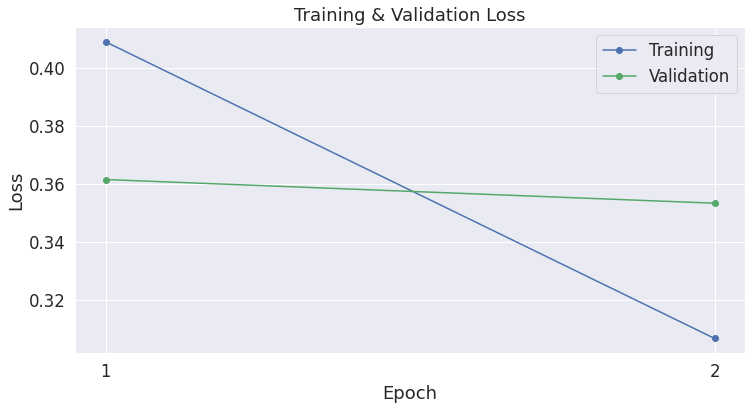

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()

# Testing the model

In [ ]:
# Create the DataLoader.
prediction_sampler = SequentialSampler(dataset_test)
prediction_dataloader = DataLoader(dataset_test, sampler=prediction_sampler, batch_size=29)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_test)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_true_labels = np.concatenate(true_labels, axis=0)

metrics_report = classification_report(flat_true_labels, flat_predictions,target_names=['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'])

print(metrics_report)

              precision    recall  f1-score   support

  BACKGROUND       0.68      0.81      0.74      3621
   OBJECTIVE       0.77      0.55      0.64      2333
     METHODS       0.93      0.95      0.94      9897
     RESULTS       0.93      0.91      0.92      9713
 CONCLUSIONS       0.85      0.82      0.83      4571

    accuracy                           0.87     30135
   macro avg       0.83      0.81      0.82     30135
weighted avg       0.87      0.87      0.87     30135



In [ ]:
import sklearn.metrics as sm
def evaluate_model_bert(pred,y):
  acc = sm.accuracy_score(y,pred)
  pr = sm.precision_score(y,pred, average='macro')
  re = sm.recall_score(y,pred, average='macro')
  f1 = sm.f1_score(pred, y, average='macro')
  return acc,pr,re,f1

In [ ]:
acc_bert,pr_bert,re_bert,f1_bert=evaluate_model_bert(flat_predictions,flat_true_labels)
print("Accuracy : "+str(acc_bert))
print("Precision : "+str(pr_bert))
print("Recall : "+str(re_bert))
print("F1 Score : "+str(f1_bert))

Accuracy : 0.8710137713622034
Precision : 0.830231850480325
Recall : 0.8095318881412659
F1 Score : 0.8151079578451069


The model has ***not beaten*** the the baseline models however has performed fairly decent in terms of its scores.
Model will improve if the embedding layer is used such that it is trained in regard to the kind of dataset it is supposed to be used for rather than any generic embedding. Generic BERT is not trained on specific datasets suited for specific purposes so something like blueBert or bioBert helps better train datasets like the one presented for this question.

# **Bonus Question: (50 points)** 

Solve question 6 but instead for fine-tuning BERT, use: BioBert
(20 points) and BlueBERT (20 points) and compare the results of the three approaches in a
nice table. Answer the following questions: Did you model beat the baseline results
(https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?

In [ ]:
!pip install biobert_embedding

In [ ]:
from biobert_embedding.embedding import BiobertEmbedding
import biobert_embedding 

In [ ]:
path = biobert_embedding.downloader.get_BioBert("google drive")

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(path, do_lower_case=True)

In [ ]:
def bert_encode(data_bert,l):
  input_ids = []
  attention_masks = []

  # For every sentence...
  for sent in data_bert:
      encoded_dict = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = 64,pad_to_max_length = True,return_attention_mask = True,return_tensors = 'pt') 
      input_ids.append(encoded_dict['input_ids'])
      attention_masks.append(encoded_dict['attention_mask'])



  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  l = torch.tensor(l)
  return input_ids,attention_masks,l


In [ ]:
input_ids_train_bio,attention_masks_train_bio,l_train_bio = bert_encode(q6_text,q6_label)
input_ids_test_bio,attention_masks_test_bio,l_test_bio = bert_encode(q6_text_test,q6_label_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset_train = TensorDataset(input_ids_train_bio, attention_masks_train_bio, l_train_bio)


train_size = int(0.9 * len(dataset_train))
val_size = len(dataset_train) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset_train, [train_size, val_size],generator=torch.Generator().manual_seed(seed_value))

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
dataset_test = TensorDataset(input_ids_test_bio, attention_masks_test_bio, l_test_bio)

162,036 training samples
18,004 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = 32 # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = 32 # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(path,num_labels = 5,output_attentions = False,output_hidden_states = False)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at /content/biobert_v1.1_pubmed_pytorch_model were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized fro

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8)

In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 2
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0,num_training_steps = total_steps)

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)


training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()


for epoch_i in range(0, epochs):
    

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

 
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        


        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

       
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        


    print("")
    print("Running Validation...")

    t0 = time.time()

    
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
 
        with torch.no_grad():        

        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

      
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

       
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 2 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:28.
  Batch    80  of  5,064.    Elapsed: 0:00:56.
  Batch   120  of  5,064.    Elapsed: 0:01:23.
  Batch   160  of  5,064.    Elapsed: 0:01:51.
  Batch   200  of  5,064.    Elapsed: 0:02:19.
  Batch   240  of  5,064.    Elapsed: 0:02:47.
  Batch   280  of  5,064.    Elapsed: 0:03:14.
  Batch   320  of  5,064.    Elapsed: 0:03:42.
  Batch   360  of  5,064.    Elapsed: 0:04:10.
  Batch   400  of  5,064.    Elapsed: 0:04:38.
  Batch   440  of  5,064.    Elapsed: 0:05:05.
  Batch   480  of  5,064.    Elapsed: 0:05:33.
  Batch   520  of  5,064.    Elapsed: 0:06:01.
  Batch   560  of  5,064.    Elapsed: 0:06:28.
  Batch   600  of  5,064.    Elapsed: 0:06:56.
  Batch   640  of  5,064.    Elapsed: 0:07:24.
  Batch   680  of  5,064.    Elapsed: 0:07:52.
  Batch   720  of  5,064.    Elapsed: 0:08:19.
  Batch   760  of  5,064.    Elapsed: 0:08:47.
  Batch   800  of  5,064.    Elapsed: 0:09:15.
  Batch   840  of

In [ ]:
pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.37,0.33,0.88,0:58:28,0:02:08
2,0.27,0.33,0.88,0:58:31,0:02:08


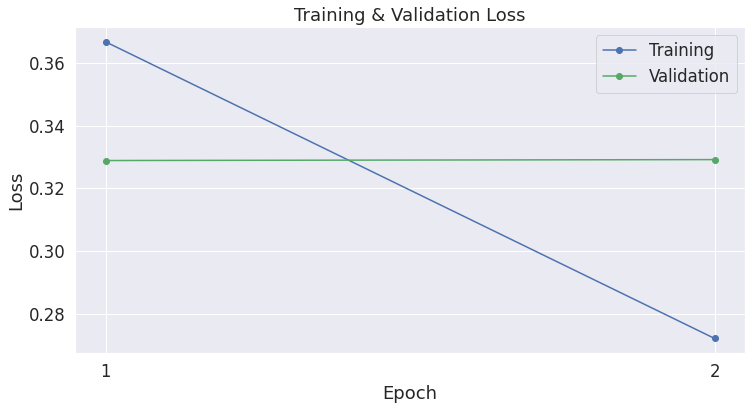

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()

# Testing the model

In [ ]:
# Create the DataLoader.
prediction_sampler = SequentialSampler(dataset_test)
prediction_dataloader = DataLoader(dataset_test, sampler=prediction_sampler, batch_size=29)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_test_bio)))

model.eval()

predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_true_labels = np.concatenate(true_labels, axis=0)

metrics_report = classification_report(flat_true_labels, flat_predictions,target_names=['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'])

print(metrics_report)

              precision    recall  f1-score   support

  BACKGROUND       0.69      0.82      0.75      3621
   OBJECTIVE       0.77      0.57      0.65      2333
     METHODS       0.93      0.96      0.94      9897
     RESULTS       0.93      0.92      0.92      9713
 CONCLUSIONS       0.87      0.84      0.85      4571

    accuracy                           0.88     30135
   macro avg       0.84      0.82      0.82     30135
weighted avg       0.88      0.88      0.88     30135



In [ ]:
acc_bertbio,pr_bertbio,re_bertbio,f1_bertbio=evaluate_model_bert(flat_predictions,flat_true_labels)
print("Accuracy : "+str(acc_bertbio))
print("Precision : "+str(pr_bertbio))
print("Recall : "+str(re_bertbio))
print("F1 Score : "+str(f1_bertbio))

Accuracy : 0.8791770366683259
Precision : 0.8383543945999843
Recall : 0.8192483188370876
F1 Score : 0.8247273690979648


In [ ]:
mt_df = pd.DataFrame()
mt_df = mt_df.append({'accuracy':acc_bert,'precision':pr_bert,'recall':re_bert,'f1 score':f1_bert},ignore_index=True)
mt_df = mt_df.append({'accuracy':acc_bertbio,'precision':pr_bertbio,'recall':re_bertbio,'f1 score':f1_bertbio},ignore_index=True)

In [ ]:
mt_df.index =['bert','bioBert']

In [ ]:
mt_df

,accuracy,f1 score,precision,recall
bert,0.87,0.82,0.83,0.81
bioBert,0.88,0.82,0.84,0.82


Based on the above table, values suggest that biobert has surpassed generic bert in modeling the given dataset. Time did not permit to proceed for blueBert